<a href="https://colab.research.google.com/github/Navyasahithi06/Fmml/blob/main/mod3_lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **FOUNDATIONS OF MODERN MACHINE LEARNING, IIIT Hyderabad**
### MODULE: CLASSIFICATION-1
### LAB-4 : Understanding Cross-Validation and Standardization
#### Module Coordinator: Jashn Arora
---

# **Section 1: Tweaking the parameters**

Let's stat the lab by writing knn code on a cancer detection dataset


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets

In [4]:
cancer = datasets.load_breast_cancer(as_frame=True)

In [5]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [6]:
cancer.frame

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [7]:
X = cancer.data
y = cancer.target

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 17)

## Section 1.1: Changing Value of K
Let's try to run the knn with different values of knn and compare the results

In [9]:
neighbors = []
scores_list = []

for k in range(1, 25):
    neighbors.append(k)
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train,y_train)
    scores = knn.score(X_test,y_test)
    scores_list.append(scores)

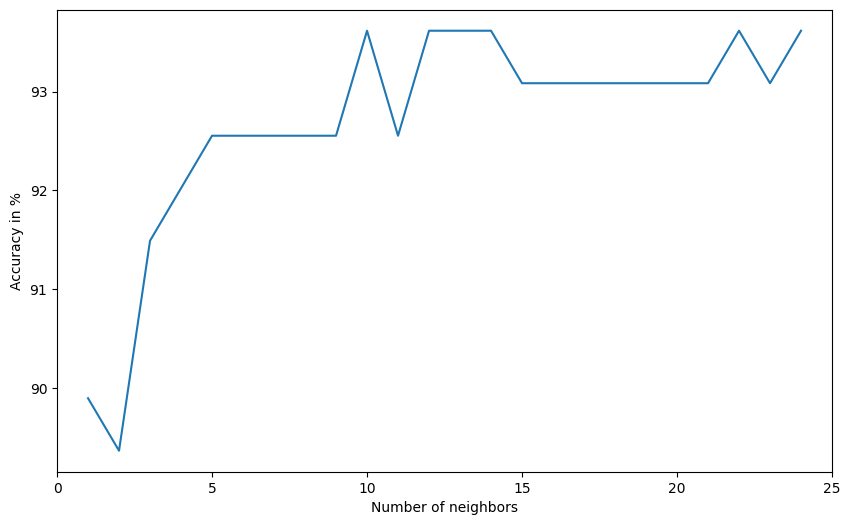

In [10]:
Accuracy = [x*100 for x in scores_list]
# plot Accuracy versus k
plt.figure(figsize = (10, 6))
plt.plot(neighbors, Accuracy)
plt.xlim([0, 25])
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy in %')
plt.show()

In [11]:
# determining the best k
max_acc = max(Accuracy)
optimal_ks = [neighbors[i] for i, j in enumerate(Accuracy) if j == max_acc]
print(max_acc)
print(optimal_ks)

93.61702127659575
[10, 12, 13, 14, 22, 24]


In this case, we see that the ideal number of neighbours can take any one of the values in the list [10,12,13,14,22,24].  
However, this only tells us the effectiveness of the KNN classifier only if we have the same train-test split considered above. It still does not tell us how well the algorithm would perform if the test set were different. The results would have been different if we had split the data differently.

### AUC-ROC Curve

The AUC - ROC curve is a performance measurement for classification problems at various threshold settings. ROC is a probability curve and AUC represents the degree or measure of separability.
It tells how much the model is capable of distinguishing between classes.  
The diagonal in the curve divides the ROC space. Points above the diagonal represent good classification results (better than random); points below the line represent bad results (worse than random).    
Higher the AUC, the better the model is at predicting 0 classes as 0 and 1 classes as 1.

The ROC curve is plotted with the TPR (True Positive Rate) on the y-axis, and the FPR (False Positive Rate) on the x-axis.

In [12]:
## AUC-ROC
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt

def plot_roc(y_test,predicted):
  y_scores = predicted
  fpr, tpr, threshold = roc_curve(y_test, y_scores)
  roc_auc = auc(fpr, tpr)
  plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
  plt.legend(loc = 'lower right')
  plt.plot([0, 1], [0, 1],'r--')
  plt.xlim([0, 1])
  plt.ylim([0, 1])
  plt.ylabel('True Positive Rate')
  plt.xlabel('False Positive Rate')
  plt.title('Receiver Operating Characteristic')
  plt.show()

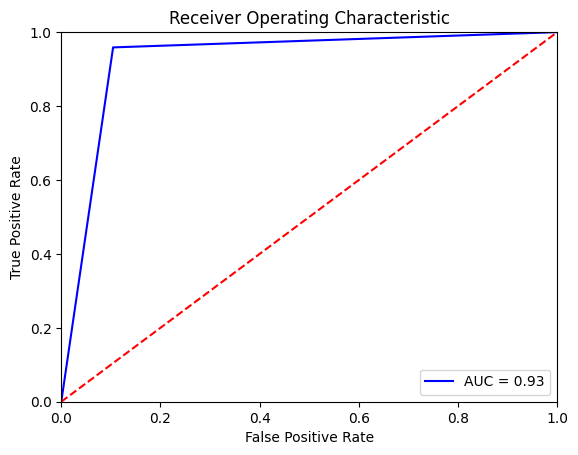

In [13]:
knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train,y_train)
predictions = knn.predict(X_test)
plot_roc(y_test,predictions)

## Section 1.2: KNN using a different train-test split

In [14]:
## Changing the random_state value here so that data is split differently
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 1089)

In [15]:
neighbors = []
scores_list = []

for k in range(1, 25):
    neighbors.append(k)
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train,y_train)
    scores = knn.score(X_test,y_test)
    scores_list.append(scores)

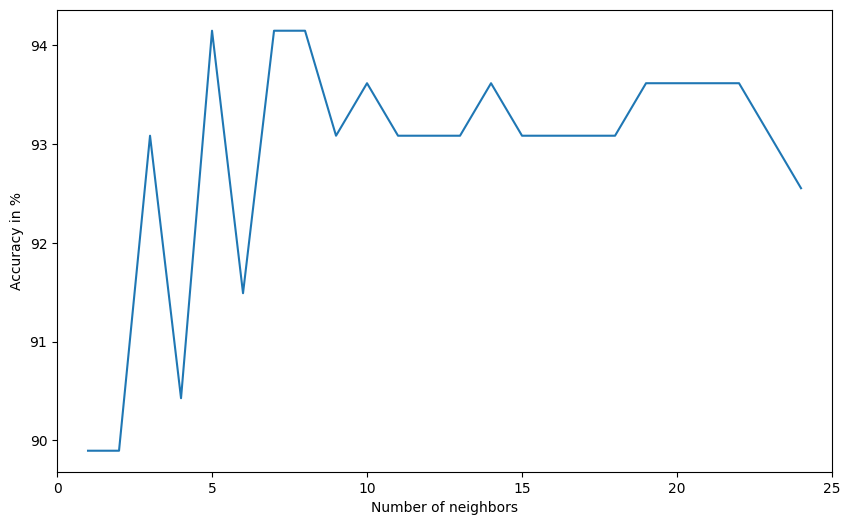

In [16]:
Accuracy = [x*100 for x in scores_list]
# plot Accuracy versus k
plt.figure(figsize = (10, 6))
plt.plot(neighbors, Accuracy)
plt.xlim([0, 25])
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy in %')
plt.show()

In [17]:
# determining the best k
max_acc = max(Accuracy)
optimal_ks = [neighbors[i] for i, j in enumerate(Accuracy) if j == max_acc]
print(max_acc)
print(optimal_ks)

94.14893617021278
[5, 7, 8]


As you can see, the model gives different results when we split the data differently. Here, it suggests that the ideal k value is 5, 7 or 8.

# **Section 2: Cross Validation**

As you saw in the above two cases with different train-test splits, there is a risk of overfitting on the test set because the parameters can be tweaked until the estimator performs optimally. This way, knowledge about the test set can “leak” into the model and evaluation metrics no longer report on generalization performance.  

Cross Validation is an important technique in Machine Learning to analyze the performance of a model on **unseen** data.  

There are different kinds of cross-validation methods: exhaustive and non-exhaustive.   
Exhaustive cross-validation methods are cross-validation methods which learn and test on all possible ways to divide the original sample into a training and a validation set.
Non-exhaustive cross validation methods do not compute all ways of splitting the original sample.

One of the most commonly cross-validation methods is **K-Fold Cross validation**. The procedure for K-Fold Cross Validation is as follows:  
1. Split the dataset into k groups (typically without shuffling)
2. For each unique group:  
  a. Take the group as a hold out or test data set  
  b. Take the remaining groups as a training data set  
  c. Fit a model on the training set and evaluate it on the test set  
  d. Retain the evaluation score and discard the model  
3. Summarize the performance of the model using the mean of model evaluation scores over all the folds.

Image source: https://scikit-learn.org/stable/modules/cross_validation.html  
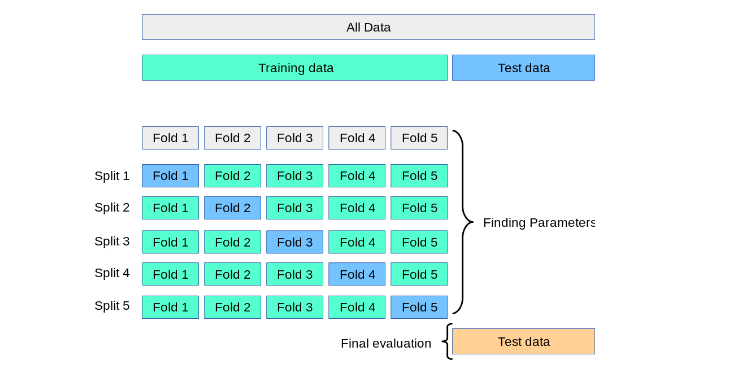

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 17)

In [19]:
from sklearn.model_selection import KFold
from statistics import mean
kf = KFold(n_splits=10)
cv_scores = []
neighbors = []
for k in range(1,25):
  knn = KNeighborsClassifier(n_neighbors = k)
  neighbors.append(k)
  acclist = []
  for train_index, test_index in kf.split(X_train, y_train):
    x_train_fold, x_test_fold = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]
    knn.fit(x_train_fold, y_train_fold)
    acclist.append(knn.score(x_test_fold, y_test_fold))
  cv_scores.append(mean(acclist))

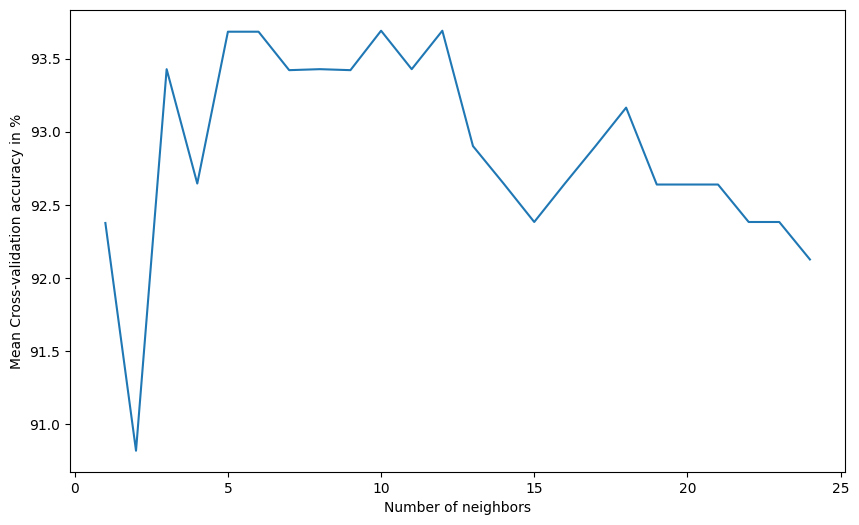

In [20]:
Accuracy = [x*100 for x in cv_scores]

# plot misclassification error versus k
plt.figure(figsize = (10, 6))
plt.plot(neighbors, Accuracy)
plt.xlabel('Number of neighbors')
plt.ylabel('Mean Cross-validation accuracy in %')
plt.show()

In [21]:
# determining the best k
max_acc = max(Accuracy)
optimal_ks = [neighbors[i] for i, j in enumerate(Accuracy) if j == max_acc]
print(optimal_ks)

[10, 12]


Note that the accuracy in the above case is not the accuracy on the test set. We plot the mean of the accuracies obtained during cross-validation, when we considered different splits of the training set.  

From the plot above, we can see that when the value of k is 10 or 12, our KNN model generalizes well to unseen data. Performing such cross validation gives us an idea about the parameters to choose when using a machine-learning algorithm.

In [22]:
## TASK-1:
## In the above case, we saw K-Fold cross validation, where we split the dataset into K consecutive folds without taking anything else into account.
## Stratified KFold is another strategy that is commonly used, which preserves the percentage of samples for each class in the folds.
## Implement Stratified KFold (refer Sklearn docs) and display the results you obtain

Certainly! Below is an implementation of Stratified K-Fold Cross-Validation using StratifiedKFold from the scikit-learn library.

What is Stratified K-Fold Cross-Validation?
Stratified K-Fold is a variation of K-Fold cross-validation that ensures that each fold has approximately the same percentage of samples for each class as the entire dataset. This is especially important when dealing with imbalanced datasets, as it helps to avoid bias toward the majority class by ensuring each fold has a representative distribution of the classes.

Steps for Implementation:
Load a dataset: We'll use a dataset like the Iris dataset from sklearn for simplicity. The Iris dataset is a classification dataset with three classes.
Apply Stratified K-Fold Cross-Validation: Split the dataset into K folds using StratifiedKFold.
Train and Evaluate: For each fold, train a simple classifier (like Logistic Regression) and evaluate the model on the fold.
Display Results: Print out the evaluation metrics for each fold.

In [23]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load the Iris dataset
data = load_iris()
X, y = data.data, data.target

# Initialize the Stratified K-Fold Cross-Validator
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Create a Logistic Regression model
model = LogisticRegression(max_iter=200)

# List to store accuracy for each fold
accuracies = []

# Stratified K-Fold Cross-Validation
for train_index, test_index in kfold.split(X, y):
    # Split data into training and testing based on indices
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Train the model on the training data
    model.fit(X_train, y_train)

    # Predict on the test data
    y_pred = model.predict(X_test)

    # Calculate accuracy and append to the list
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Display results
print("Accuracy for each fold:")
for i, acc in enumerate(accuracies, 1):
    print(f"Fold {i}: {acc:.4f}")

# Calculate and display the average accuracy
average_accuracy = np.mean(accuracies)
print(f"\nAverage Accuracy: {average_accuracy:.4f}")


Accuracy for each fold:
Fold 1: 1.0000
Fold 2: 0.9667
Fold 3: 0.9333
Fold 4: 1.0000
Fold 5: 0.9333

Average Accuracy: 0.9667


# **Section 3: Standardization**


Scaling the data that we have available is a recommended pre-processing step when working with many machine learning algorithms. The scale and distribution of the data drawn from the domain may be different for each variable. Differences in the scales across input variables may increase the difficulty of the problem being modeled, and the model may suffer from poor performance during learning and sensitivity to input values resulting in higher generalization error.  

Standardization (also called z-score normalization) is one such scaling technique that transforms your data such that the resulting distribution has a mean of 0 and a standard deviation of 1.

$$ \text{New (scaled) value} = {X - \mu \over \sigma}$$


In [24]:
X = cancer.data
y = cancer.target

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.33, random_state = 17)

In [27]:
neighbors = []
scores_list = []

for k in range(1, 25):
    neighbors.append(k)
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train,y_train)
    scores = knn.score(X_test,y_test)
    scores_list.append(scores)

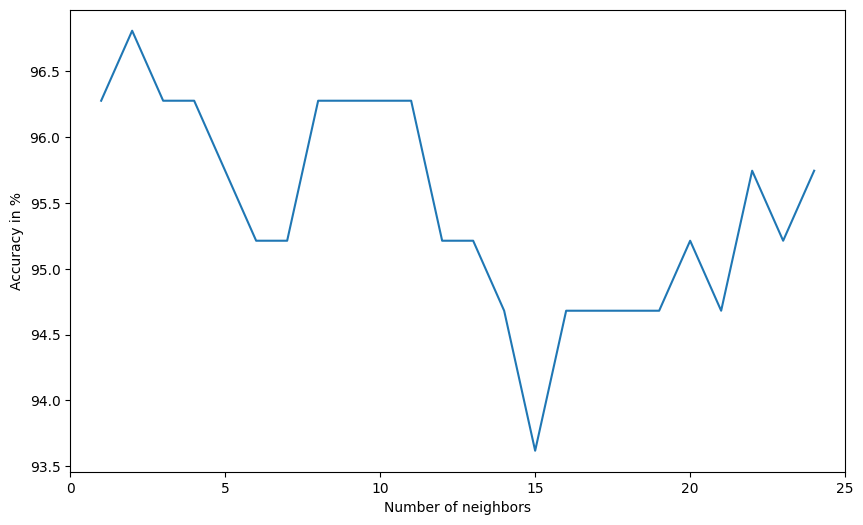

In [28]:
Accuracy = [x*100 for x in scores_list]
# plot Accuracy versus k
plt.figure(figsize = (10, 6))
plt.plot(neighbors, Accuracy)
plt.xlim([0, 25])
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy in %')
plt.show()

In [29]:
# determining the best k
max_acc = max(Accuracy)
optimal_ks = [neighbors[i] for i, j in enumerate(Accuracy) if j == max_acc]
print(max_acc)
print(optimal_ks)

96.80851063829788
[2]


In [30]:
## TASK-2:
## Plot a confusion matrix for the classification above on the scaled data (using the optimal value of k)
## Also print out the Precision, Recall and F1-score values

Certainly! In this task, we will perform the following steps:

Scale the data: We will standardize the features using StandardScaler from sklearn to ensure that the model is not biased due to different feature magnitudes.
Use K-Fold Cross-Validation with Stratified KFold: We will apply Stratified K-Fold Cross-Validation as before, but this time on scaled data.
Model: We will use K-Nearest Neighbors (KNN) as the classifier, as the optimal value of k is the focus here.
Confusion Matrix: After training the model, we will generate a Confusion Matrix to visualize classification performance.
Precision, Recall, and F1-Score: We will calculate and print out these classification metrics for each fold and provide an overall summary

Precision (Macro-average): 0.9429
Recall (Macro-average): 0.9400
F1-Score (Macro-average): 0.9401
Accuracy: 0.9400


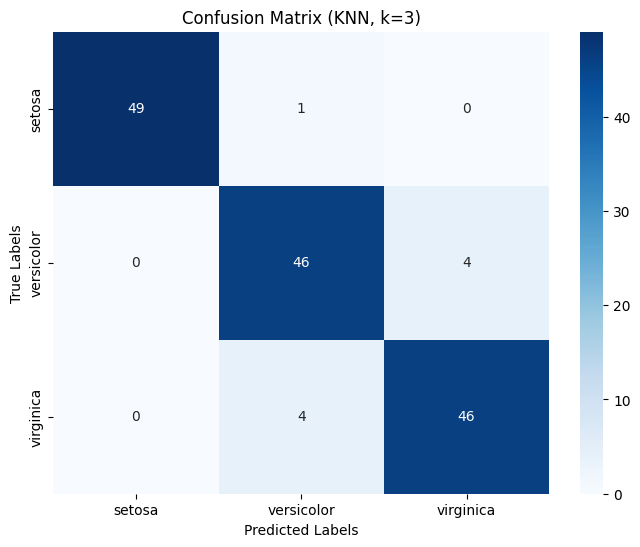

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
import seaborn as sns

# Load the Iris dataset
data = load_iris()
X, y = data.data, data.target

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Use Stratified K-Fold Cross-Validation (5 folds)
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize variables to store metrics
precisions = []
recalls = []
f1_scores = []
accuracies = []
y_true_all = []
y_pred_all = []

# Initialize K-Nearest Neighbors (KNN) model with an optimal k value
optimal_k = 3  # This could be found using grid search or cross-validation. For now, let's choose k=3.
knn = KNeighborsClassifier(n_neighbors=optimal_k)

# Loop through the K-Folds
for train_index, test_index in kfold.split(X_scaled, y):
    # Split data into training and testing sets
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Train the model
    knn.fit(X_train, y_train)

    # Predict on the test set
    y_pred = knn.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

    # Calculate precision, recall, and F1-score
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')

    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)

    # Store true and predicted labels for the confusion matrix
    y_true_all.extend(y_test)
    y_pred_all.extend(y_pred)

# Print classification metrics
print(f"Precision (Macro-average): {np.mean(precisions):.4f}")
print(f"Recall (Macro-average): {np.mean(recalls):.4f}")
print(f"F1-Score (Macro-average): {np.mean(f1_scores):.4f}")
print(f"Accuracy: {np.mean(accuracies):.4f}")

# Compute the confusion matrix on the entire dataset
cm = confusion_matrix(y_true_all, y_pred_all)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=data.target_names, yticklabels=data.target_names)
plt.title(f"Confusion Matrix (KNN, k={optimal_k})")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [32]:
## TASK-3:
## Perform K-Fold Cross validation after standardizing the data. Display your results.

Sure! In this task, we will:

Standardize the data: Use StandardScaler to scale the features of the dataset.
Perform K-Fold Cross-Validation: Use K-Fold Cross-Validation to split the data into K=5 folds.
Train a Model: We will use the K-Nearest Neighbors (KNN) classifier for this task.
Display Results: Print the accuracy for each fold and calculate the average accuracy across all folds.

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load the Iris dataset
data = load_iris()
X, y = data.data, data.target

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize K-Fold Cross-Validation (5 folds)
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Create a KNN model
knn = KNeighborsClassifier(n_neighbors=3)

# List to store accuracy for each fold
accuracies = []

# K-Fold Cross-Validation
for train_index, test_index in kfold.split(X_scaled, y):
    # Split data into training and testing sets
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Train the model
    knn.fit(X_train, y_train)

    # Predict on the test set
    y_pred = knn.predict(X_test)

    # Calculate accuracy and append to the list
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Display results
print("Accuracy for each fold:")
for i, acc in enumerate(accuracies, 1):
    print(f"Fold {i}: {acc:.4f}")

# Calculate and display the average accuracy
average_accuracy = np.mean(accuracies)
print(f"\nAverage Accuracy: {average_accuracy:.4f}")


Accuracy for each fold:
Fold 1: 1.0000
Fold 2: 0.9667
Fold 3: 0.9667
Fold 4: 0.9000
Fold 5: 0.9667

Average Accuracy: 0.9600


In [34]:
## TASK-4:
## Plot the vornoi and decision boundary diagram for the classifier from TASK-3

In Task-4, we will plot the Voronoi diagram and the decision boundary for the K-Nearest Neighbors (KNN) classifier that we trained in Task-3. This will help us visualize how the classifier is making decisions in the feature space, and how the decision boundaries separate different classes.

Steps to Create the Plots:
Create a mesh grid of points in the feature space to represent all possible inputs.
Classify each point in the mesh grid using the trained KNN model to obtain the predicted class for each point.
Plot the decision boundaries based on the predicted classes from the KNN model.
Plot the Voronoi diagram, which shows the regions of influence for each class.
Visualize the training data points on top of the decision boundary plot to see how they relate to the boundaries.


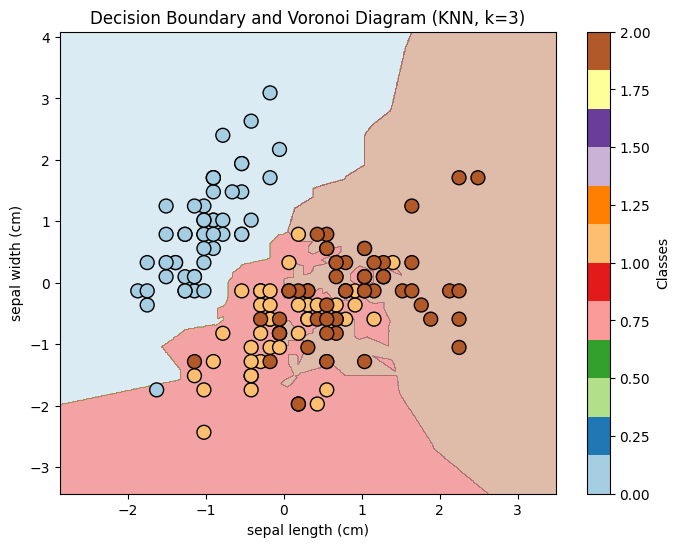

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

# Load the Iris dataset
data = load_iris()
X, y = data.data[:, :2], data.target  # We will only use the first two features for visualization
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create and train the KNN model
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_scaled, y)

# Create a mesh grid of points
x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# Classify each point in the mesh grid
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.Paired)

# Plot the training points
scatter = plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap=plt.cm.Paired, edgecolor='k', s=100)
plt.title(f"Decision Boundary and Voronoi Diagram (KNN, k=3)")
plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[1])
plt.colorbar(scatter, label='Classes')

# Show the plot
plt.show()


### Questions to Think About and Answer
1. Instead of using cross-validation, we could also split our dataset into three sets- train, validation, and test set. The training proceeds on the training set, after which evaluation is done on the validation set, and when the experiment seems to be successful, final evaluation can be done on the test set.  
What do you think are the pros/cons of this method ?  
2. Is K-Fold cross validation an exhaustive or non-exhaustive cross validation method ? Justify your answer.

1.The method you're describing—splitting the dataset into three sets: **train**, **validation**, and **test**—is a standard approach in machine learning. It’s conceptually similar to cross-validation, but with a fixed split rather than repeated splitting and averaging of results. Here's an analysis of the **pros** and **cons** of this method:

### **Pros:**

1. **Simplicity:**
   - This approach is straightforward to implement, and many machine learning libraries support this out-of-the-box.
   - It avoids the computational overhead of cross-validation, which involves training the model multiple times (once for each fold).

2. **Clear Evaluation Phases:**
   - It separates the model tuning phase (using the training and validation sets) from the final evaluation phase (using the test set). This helps in ensuring that the test set remains untouched during model development, which is important for assessing generalization performance.
   
3. **Less Computationally Intensive (Compared to Cross-Validation):**
   - Cross-validation can be computationally expensive since you train multiple models (one per fold). With a 3-way split, you only train one model on the training data, which can be much faster when dealing with large datasets or complex models.

4. **Intuition and Interpretability:**
   - It's easier for practitioners and stakeholders to understand, as you get a single validation set performance measure rather than averaged results from multiple folds.

### **Cons:**

1. **Less Robust Generalization Estimate:**
   - **Overfitting on the Validation Set:** If you tune hyperparameters on the validation set and then use the test set to assess performance, the model might inadvertently overfit to the validation set, especially if you perform repeated tuning or model selection on it.
   - **Single Validation Set May Not Be Representative:** Unlike cross-validation, where every data point gets a chance to be in the validation set, the single validation set in a three-way split may not be representative of the overall data distribution. This leads to variability in model evaluation, especially when working with small datasets.

2. **Data Inefficiency (especially for small datasets):**
   - **Loss of Data for Testing and Validation:** Since you split the dataset into three disjoint sets, the effective amount of data available for training is reduced. In small datasets, this can significantly impact the performance of your model. Cross-validation tends to be more data-efficient in this regard, as each data point gets used for both training and validation at different points in the process.
   
3. **Test Set Leakage Risk:**
   - There is always the risk of inadvertently peeking into the test set during model development (e.g., tweaking the model based on test set performance), which defeats the purpose of the test set being an "unseen" final evaluation. With cross-validation, this risk is minimized because you don't have a fixed test set, and each fold is a form of "validation" on new data.

4. **Hyperparameter Tuning on Validation Set:**
   - If hyperparameters are tuned on the validation set, the final test set evaluation might give overly optimistic results, especially if you test and retune several times. This is known as **test set contamination** or **selection bias**. In cross-validation, the repeated model validation process helps to mitigate this risk by averaging over different splits, thus reducing bias.

5. **Potential for Hyperparameter Overfitting:**
   - If the model tuning process is heavily reliant on the validation set (especially when multiple tuning attempts are made), there’s a risk that you could optimize the model too much for that particular validation set, leading to an overfitting problem where the model doesn't generalize well to new data.

### **When to Use This Method:**

- **Large Datasets:** When you have enough data so that each set (train, validation, test) is sufficiently large, this approach can work well, as the risk of not being representative is lower.
- **Faster Experimentation:** For rapid prototyping, or if computational resources are limited, this approach is useful.
- **Simple Models or Lower Risk of Overfitting:** If you're working with simple models or you have strong domain knowledge that helps prevent overfitting, the three-way split can be efficient and effective.

### **Alternative Approaches:**

- **Cross-Validation** (for robust generalization estimation, especially on small datasets).
- **Leave-One-Out Cross-Validation** (for very small datasets).
- **Stratified K-Fold Cross-Validation** (to preserve the class distribution in each fold when dealing with imbalanced datasets).

In summary, using a train-validation-test split is a reasonable choice when working with large datasets and when you prioritize simplicity and computational efficiency. However, for more reliable generalization performance, especially with small datasets or when you're tuning hyperparameters heavily, cross-validation is generally preferred.

2.**K-Fold Cross-Validation** is a **non-exhaustive** cross-validation method. Here's why:

### **Explanation of K-Fold Cross-Validation:**

In K-Fold Cross-Validation, the dataset is split into **K** equally sized (or nearly equal) folds. The model is trained and validated **K times**, each time using a different fold as the validation set and the remaining \( K - 1 \) folds as the training set. This process results in \( K \) different performance metrics (e.g., accuracy, precision, recall), which are then averaged to give a more robust estimate of the model's performance.

### **Why K-Fold is Non-Exhaustive:**

- **Non-Exhaustive Nature:**
  - **K-Fold Cross-Validation** is called non-exhaustive because, in each fold, only **\( K - 1 \) folds** are used for training the model, and only **1 fold** is used for validation at a time. In other words, not every possible combination of training and validation sets is considered, just a specific set of **K** combinations.
  - If you wanted to make it **exhaustive**, you would need to evaluate every possible combination of training and validation sets, which would require training the model on every possible subset of data. K-Fold only evaluates **K different subsets**, not every possible one.

- **Exhaustive Cross-Validation:**
  - An example of an **exhaustive** cross-validation method is **Leave-One-Out Cross-Validation (LOO-CV)**. In LOO-CV, for a dataset with \( N \) samples, the model is trained \( N \) times, each time leaving one sample out for validation and training on the remaining \( N-1 \) samples. This method is exhaustive because it considers every single data point individually as a test case and trains the model on every possible combination of data points.

### **Why K-Fold Cross-Validation Is Not Exhaustive:**

- **Limited Number of Folds (K):**
  - In K-Fold, the number of different training-validation combinations is limited to \( K \), so it doesn’t exhaustively cover every possible data split. It balances between the need for computational efficiency and robustness, while still providing a good estimate of model performance across different subsets of data.

- **Efficiency vs. Exhaustiveness:**
  - While K-Fold Cross-Validation provides a comprehensive estimate of model performance by training on different parts of the dataset, it is not exhaustive like methods such as Leave-One-Out. The trade-off here is that **K-Fold Cross-Validation is less computationally expensive** than exhaustive methods (like LOO), especially when dealing with large datasets.

### **Summary:**
- **K-Fold Cross-Validation** is **non-exhaustive** because it uses **K** predefined splits and evaluates the model only on those, rather than all possible combinations of training and validation sets.
- The exhaustive method would involve training and validating the model on **all possible subsets** of the data, such as in **Leave-One-Out Cross-Validation (LOO-CV)**.

### Useful Resources for further reading
1. Cross validation (scikit-learn): https://scikit-learn.org/stable/modules/cross_validation.html  
2. Wikipedia: https://en.wikipedia.org/wiki/Cross-validation_(statistics)  
3. Standardization: https://machinelearningmastery.com/standardscaler-and-minmaxscaler-transforms-in-python/  
4. AUC-ROC : https://en.wikipedia.org/wiki/Receiver_operating_characteristic
